<a href="https://colab.research.google.com/github/alimmhmmdd/Perancangan-Aplikasi-EcoJangkau-dan-Analisis-Data/blob/main/Hasil_Analisis_Data_dan_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Data Load**

Import data melalui Github

In [ ]:
data = 'https://raw.githubusercontent.com/ireumeobseo/ceimpact/main/final_raw_sample_0_percent.csv'

In [ ]:
df = pd.read_csv(data)

In [ ]:
df.columns = ['year', 'company', 'country', 'industry', 'revenue', 'operating_income', 'cost', 'working_capacity', 'fish_production_capacity', 'crop_production_capacity', 'meat_production_capacity', 'biodiversity', 'abiotic_resources', 'water_production_capacity', 'wood_production_capacity', '%imputed']

In [ ]:
df.head()

,year,company,country,industry,revenue,operating_income,cost,working_capacity,fish_production_capacity,crop_production_capacity,meat_production_capacity,biodiversity,abiotic_resources,water_production_capacity,wood_production_capacity,%imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,-1.09%,-10.05%,-55232974.0,-48590497.0,-11456,-646758,-151520,-2061,-3661,-5828063.0,1042,2.00%
1,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediati...,-0.81%,-5.31%,-55143250.0,-50727341.0,-11763,-673791,-157783,-2131,-3489,-3567524.0,571,0.00%
2,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,-1.53%,-9.38%,-54677862.0,-53489006.0,-12428,-711263,-166744,-2244,-3428,-293207.0,458,1.00%
3,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediati...,-2.26%,-35.02%,-43298590.0,-18912678.0,-4652,-249594,-58535,-811,-3850,-24069048.0,578,2.00%
4,2018,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,-0.56%,-4.40%,-30862191.0,-30189038.0,-7276,-402067,-94143,-1298,-3953,-165542.0,1126,3.00%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13177 entries, 0 to 13176
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       13177 non-null  int64  
 1   company                    13177 non-null  object 
 2   country                    13177 non-null  object 
 3   industry                   13177 non-null  object 
 4   revenue                    13177 non-null  object 
 5   operating_income           12421 non-null  object 
 6   cost                       13177 non-null  float64
 7   working_capacity           13177 non-null  float64
 8   fish_production_capacity   13177 non-null  int64  
 9   crop_production_capacity   13177 non-null  int64  
 10  meat_production_capacity   13177 non-null  int64  
 11  biodiversity               13177 non-null  int64  
 12  abiotic_resources          13177 non-null  object 
 13  water_production_capacity  13177 non-null  flo

# **Cleaning Data**

## **Mengubah Format kolom tertentu**

In [ ]:
# Mengonversi kolom persentase ke tipe data float
percent_columns = ['revenue', 'operating_income', '%imputed']
df[percent_columns] = df[percent_columns].replace('%', '', regex=True).astype(float)

In [ ]:
df[percent_columns]

,revenue,operating_income,%imputed
0,-1.09,-10.05,2.0
1,-0.81,-5.31,0.0
2,-1.53,-9.38,1.0
3,-2.26,-35.02,2.0
4,-0.56,-4.40,3.0
...,...,...,...
13172,-1.39,-36.98,6.0
13173,-1.25,-10.98,7.0
13174,-0.04,-2.26,15.0
13175,-1.01,-33.05,4.0


In [ ]:
# Mengonversi kolom 'abiotic' dan 'wood' ke tipe data numerik
numeric_columns = ['abiotic_resources', 'wood_production_capacity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
df[numeric_columns]

,abiotic_resources,wood_production_capacity
0,-3661.0,1042.0
1,-3489.0,571.0
2,-3428.0,458.0
3,-3850.0,578.0
4,-3953.0,1126.0
...,...,...
13172,-20845.0,18146.0
13173,-4032.0,3510.0
13174,-83836.0,1711.0
13175,-2898.0,1505.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13177 entries, 0 to 13176
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       13177 non-null  int64  
 1   company                    13177 non-null  object 
 2   country                    13177 non-null  object 
 3   industry                   13177 non-null  object 
 4   revenue                    13177 non-null  float64
 5   operating_income           12421 non-null  float64
 6   cost                       13177 non-null  float64
 7   working_capacity           13177 non-null  float64
 8   fish_production_capacity   13177 non-null  int64  
 9   crop_production_capacity   13177 non-null  int64  
 10  meat_production_capacity   13177 non-null  int64  
 11  biodiversity               13177 non-null  int64  
 12  abiotic_resources          13028 non-null  float64
 13  water_production_capacity  13177 non-null  flo

Dapat dilihat kolom awal object yang seharusnya numerik telah menjadi format numerik

## **Deteksi Missing Value**

In [ ]:
mv = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(df)).round(2)*100
mv

,No. of missing values,% missing_values
year,0,0.0
company,0,0.0
country,0,0.0
industry,0,0.0
revenue,0,0.0
operating_income,756,6.0
cost,0,0.0
working_capacity,0,0.0
fish_production_capacity,0,0.0
crop_production_capacity,0,0.0


Terlihat pada kolom operating_income terdapat sebesar 756 atau sekitar 6%,pada kolom abiotic_resources 149 atau sekitar 1% dan kolo wood_production capacity sebesar 38 missing values.

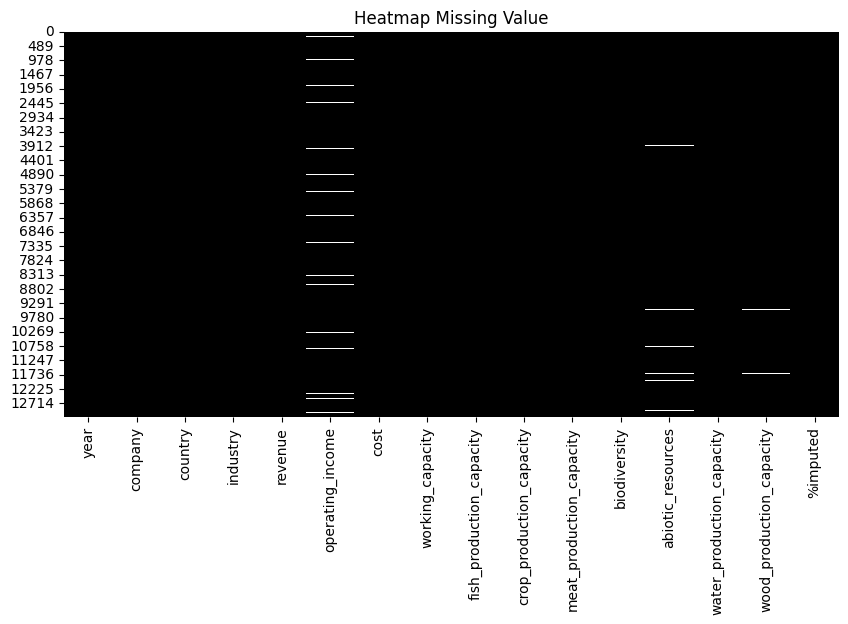

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()

Saya ingin mengganti nilai missing values dengan nilai mean dari kolom itu sendiri

In [ ]:
# Mengisi nilai yang hilang dengan nilai rata-rata
df['operating_income'].fillna(df['operating_income'].mean(), inplace=True)

In [ ]:
# Mengisi nilai yang hilang dengan nilai rata-rata
df['abiotic_resources'].fillna(df['abiotic_resources'].mean(), inplace=True)

In [ ]:
# Mengisi nilai yang hilang dengan nilai rata-rata
df['wood_production_capacity'].fillna(df['wood_production_capacity'].mean(), inplace=True)

In [ ]:
mv = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(df)).round(2)*100
mv

,No. of missing values,% missing_values
year,0,0.0
company,0,0.0
country,0,0.0
industry,0,0.0
revenue,0,0.0
operating_income,0,0.0
cost,0,0.0
working_capacity,0,0.0
fish_production_capacity,0,0.0
crop_production_capacity,0,0.0


Dapat dilihat tidak ada lagi missing values pada kolom manapun

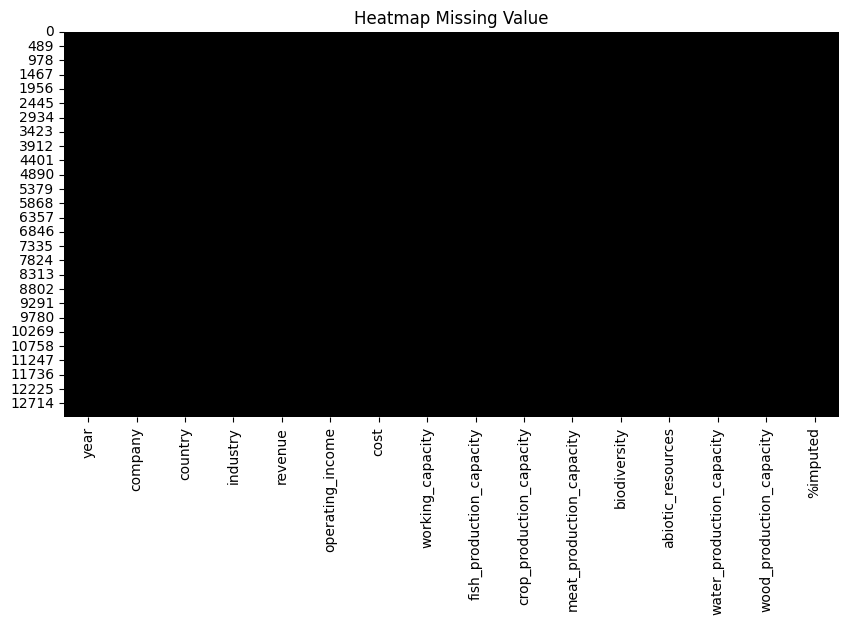

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()

## **Deteksi Outliers**

Kami akan mendeteksi berapa persen outliers yang ada pada kolom numerik dengan Zscore

In [ ]:
df['revenue'].array

<PandasArray>
[ -1.09,  -0.81,  -1.53,  -2.26,  -0.56,  -0.55,  -2.59,  -0.26,  -0.04,
  -0.08,
 ...
  -2.75,  -3.47,  -2.24,  -1.71, -13.97,  -1.39,  -1.25,  -0.04,  -1.01,
  -0.42]
Length: 13177, dtype: float64

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df['revenue'])
outliers_percentage = len(df[(z_scores > 5) | (z_scores < -5)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.05%


In [ ]:
df['operating_income'].array

<PandasArray>
[-10.05,  -5.31,  -9.38, -35.02,   -4.4,  -4.08, -11.19,  -1.02,  -0.48,
  -2.03,
 ...
 -20.55, -54.01, -11.33, -37.22, -37.12, -36.98, -10.98,  -2.26, -33.05,
 -14.65]
Length: 13177, dtype: float64

In [ ]:
z_scores = zscore(df['operating_income'])
outliers_percentage = len(df[(z_scores > 10) | (z_scores < -10)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.11%


In [ ]:
df['cost'].array

<PandasArray>
[ -55232974.0,  -55143250.0,  -54677862.0,  -43298590.0,  -30862191.0,
  -30420679.0,  -28371092.0,  -25205768.0,  -22228620.0,  -21121606.0,
 ...
 -873654337.0, -509646402.0, -410141198.0, -259664259.0, -231567078.0,
 -164603915.0,  -28693183.0,  -45130939.0,  -37973013.0,  -21860367.0]
Length: 13177, dtype: float64

In [ ]:
z_scores = zscore(df['cost'])
outliers_percentage = len(df[(z_scores > 10) | (z_scores < -10)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.29%


In [ ]:
df['working_capacity'].array

<PandasArray>
[ -48590497.0,  -50727341.0,  -53489006.0,  -18912678.0,  -30189038.0,
  -24969269.0,  -27754833.0,  -23929648.0,  -21714912.0,  -20063296.0,
 ...
 -823565574.0, -498842737.0, -395833546.0, -254291149.0, -227111110.0,
 -161235941.0,  -27082423.0,  -41935531.0,  -37146871.0,  -21381026.0]
Length: 13177, dtype: float64

In [ ]:
z_scores = zscore(df['working_capacity'])
outliers_percentage = len(df[(z_scores > 10) | (z_scores < -10)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.09%


In [ ]:
df['fish_production_capacity'].array

<PandasArray>
[ -11456,  -11763,  -12428,   -4652,   -7276,   -7800,   -6407,   -5996,
   -4476,   -6617,
 ...
 -186414, -122982, -101643,  -67356,  -82868,  -44060,   -7584,  -13246,
   -9000,   -5416]
Length: 13177, dtype: int64

In [ ]:
z_scores = zscore(df['fish_production_capacity'])
outliers_percentage = len(df[(z_scores > 7) | (z_scores < -7)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.28%


In [ ]:
df['crop_production_capacity'].array

<PandasArray>
[  -646758,   -673791,   -711263,   -249594,   -402067,   -339439,   -369092,
   -317928,   -264529,   -261507,
 ...
 -10523264,  -6475244,  -5065596,  -3217440,  -2506991,  -2015875,   -335328,
   -496341,   -494356,   -279937]
Length: 13177, dtype: int64

In [ ]:
z_scores = zscore(df['crop_production_capacity'])
outliers_percentage = len(df[(z_scores > 7) | (z_scores < -7)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.23%


In [ ]:
df['meat_production_capacity'].array

<PandasArray>
[ -151520,  -157783,  -166744,   -58535,   -94143,   -79427,   -86530,
   -74511,   -60836,   -60285,
 ...
 -2463292, -1515686, -1184596,  -751822,  -578207,  -470665,   -78239,
  -116908,  -115847,   -65000]
Length: 13177, dtype: int64

In [ ]:
z_scores = zscore(df['meat_production_capacity'])
outliers_percentage = len(df[(z_scores > 7) | (z_scores < -7)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.23%


In [ ]:
df['biodiversity'].array

<PandasArray>
[  -2061,   -2131,   -2244,    -811,   -1298,   -1281,   -1161,   -1044,
    -820,   -1064,
 ...
  -33477,  -21554,  -17464,  -11403, -247327,   -7350,   -1251,   -1846,
   -1603,    -945]
Length: 13177, dtype: int64

In [ ]:
z_scores = zscore(df['biodiversity'])
outliers_percentage = len(df[(z_scores > 3) | (z_scores < -3)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.11%


In [ ]:
df['abiotic_resources'].array

<PandasArray>
[  -3661.0,   -3489.0,   -3428.0,   -3850.0,   -3953.0, -194781.0,   -1053.0,
   -9169.0,  -74336.0,  -30725.0,
 ...
  -55842.0,  -25822.0,  -32255.0,  -26690.0, -101300.0,  -20845.0,   -4032.0,
  -83836.0,   -2898.0,  -15387.0]
Length: 13177, dtype: float64

In [ ]:
z_scores = zscore(df['abiotic_resources'])
outliers_percentage = len(df[(z_scores > 3) | (z_scores < -3)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.16%


In [ ]:
df['water_production_capacity'].array

<PandasArray>
[ -5828063.0,  -3567524.0,   -293207.0, -24069048.0,   -165542.0,  -4835062.0,
   -152156.0,   -868695.0,   -106967.0,   -704473.0,
 ...
 -36808674.0,  -2664855.0,  -7934175.0,  -1321634.0,  -1019015.0,   -827325.0,
  -1187837.0,  -2484942.0,   -203943.0,   -114280.0]
Length: 13177, dtype: float64

In [ ]:
z_scores = zscore(df['water_production_capacity'])
outliers_percentage = len(df[(z_scores > 10) | (z_scores < -10)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.25%


In [ ]:
df['wood_production_capacity'].array

<PandasArray>
[  1042.0,    571.0,    458.0,    578.0,   1126.0,   6380.0,    140.0,
   1224.0,  -1743.0,   6361.0,
 ...
 -17801.0,  22479.0,  28079.0,  23235.0,  79739.0,  18146.0,   3510.0,
   1711.0,   1505.0,   1624.0]
Length: 13177, dtype: float64

In [ ]:
z_scores = zscore(df['wood_production_capacity'])
outliers_percentage = len(df[(z_scores > 5) | (z_scores < -5)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.47%


In [ ]:
df['%imputed'].array

<PandasArray>
[ 2.0,  0.0,  1.0,  2.0,  3.0,  6.0,  1.0,  5.0, 19.0, 15.0,
 ...
  6.0,  3.0,  4.0,  5.0, 16.0,  6.0,  7.0, 15.0,  4.0,  4.0]
Length: 13177, dtype: float64

In [ ]:
z_scores = zscore(df['%imputed'])
outliers_percentage = len(df[(z_scores > 3) | (z_scores < -3)]) / len(df) * 100
print(f'Persentase Outlier: {outliers_percentage:.2f}%')

Persentase Outlier: 0.00%


Dari hasil-hasil persentase Outliers pada setiap kolom, kammi tidak akan membuang nilai Outliers, karena Tidak seharusnya membuang outlier saat terdapat banyak outlier. Mengapa? Karena menurut definisinya, outlier jarang terjadi. Sebagai contoh saat 30% dari data adalah outlier, fenomena itu berarti ada sesuatu yang kasuistik pada data kamu, yang perlu telah lebih lanjut. Selain itu, kamu juga tidak disarankan untuk membuang outlier ketika hasil analisis sangat sensitif, sehingga perubahan kecil pun bisa berakibat fatal.

## **Format & Storing**

In [ ]:
# Mengubah kolom 'year' menjadi format datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [ ]:
df['year'] = df['year'].dt.year

In [ ]:
df

,year,company,country,industry,revenue,operating_income,cost,working_capacity,fish_production_capacity,crop_production_capacity,meat_production_capacity,biodiversity,abiotic_resources,water_production_capacity,wood_production_capacity,%imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,-1.09,-10.05,-55232974.0,-48590497.0,-11456,-646758,-151520,-2061,-3661.0,-5828063.0,1042.0,2.0
1,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediati...,-0.81,-5.31,-55143250.0,-50727341.0,-11763,-673791,-157783,-2131,-3489.0,-3567524.0,571.0,0.0
2,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,-1.53,-9.38,-54677862.0,-53489006.0,-12428,-711263,-166744,-2244,-3428.0,-293207.0,458.0,1.0
3,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediati...,-2.26,-35.02,-43298590.0,-18912678.0,-4652,-249594,-58535,-811,-3850.0,-24069048.0,578.0,2.0
4,2018,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,-0.56,-4.40,-30862191.0,-30189038.0,-7276,-402067,-94143,-1298,-3953.0,-165542.0,1126.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13172,2010,KINTETSU GROUP HOLDINGS CO LTD,Japan,Transport via railways,-1.39,-36.98,-164603915.0,-161235941.0,-44060,-2015875,-470665,-7350,-20845.0,-827325.0,18146.0,6.0
13173,2010,NANKAI ELECTRIC RAILWAY CO LTD,Japan,Transport via railways,-1.25,-10.98,-28693183.0,-27082423.0,-7584,-335328,-78239,-1251,-4032.0,-1187837.0,3510.0,7.0
13174,2010,MCKESSON CORPORATION,United States,"Wholesale trade and commission trade,except of...",-0.04,-2.26,-45130939.0,-41935531.0,-13246,-496341,-116908,-1846,-83836.0,-2484942.0,1711.0,15.0
13175,2010,"UNITED NATURAL FOODS,INC.",United States,"Wholesale trade and commission trade,except of...",-1.01,-33.05,-37973013.0,-37146871.0,-9000,-494356,-115847,-1603,-2898.0,-203943.0,1505.0,4.0


In [ ]:
##Mengubah Nilai Negatif

df[['revenue', 'operating_income',
       'cost', 'working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
      ]] = df[['revenue', 'operating_income',
       'cost', 'working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
      ]].apply(lambda x: x*(-1))

In [ ]:
df.to_csv('Data_Cleaning.csv', index = False)

In [ ]:
## Aggregasi Nilai
gb_year = df.groupby('year').sum()

<ipython-input-48-78bdabfdea93>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_year = df.groupby('year').sum()


In [ ]:
gb_year.columns

Index(['revenue', 'operating_income', 'cost', 'working_capacity',
       'fish_production_capacity', 'crop_production_capacity',
       'meat_production_capacity', 'biodiversity', 'abiotic_resources',
       'water_production_capacity', 'wood_production_capacity', '%imputed'],
      dtype='object')

In [ ]:
gb_year

,revenue,operating_income,cost,working_capacity,fish_production_capacity,crop_production_capacity,meat_production_capacity,biodiversity,abiotic_resources,water_production_capacity,wood_production_capacity,%imputed
year,,,,,,,,,,,,
2010,179761.57,3.039676e+05,2.079664e+12,1.438751e+12,430875123,18780260951,4380068146,68788242,6.661475e+09,6.108365e+11,1.861588e+08,4714.0
2011,30914.44,4.772696e+05,2.279574e+12,1.519349e+12,449729316,19788089889,4597331757,184231480,7.938010e+09,7.275131e+11,1.886419e+08,5481.0
2012,32891.32,5.450034e+05,2.440812e+12,1.445089e+12,441049391,18768959754,4387578300,228914077,8.180061e+09,9.639781e+11,2.082859e+08,5959.0
2013,39881.08,6.594362e+05,2.692308e+12,1.617900e+12,484027870,21154201493,4926758458,208282609,4.850793e+09,1.043055e+12,2.195479e+08,6273.0
2014,1868389.69,5.953931e+05,2.271665e+12,1.672845e+12,474964477,21829215394,5097892051,78269852,5.801756e+09,5.657601e+11,1.645226e+08,6933.0
2015,1838768.77,1.148354e+06,2.497443e+12,1.784786e+12,495153409,23338329059,5449655834,84135730,5.647810e+09,6.778741e+11,1.582009e+08,7796.0
2016,302030.49,5.352487e+05,2.327096e+12,1.685170e+12,502657815,21985924316,5134816641,82434076,4.450085e+09,6.100745e+11,2.221672e+08,8621.0
2017,287126.10,5.631189e+05,2.893546e+12,1.890135e+12,563600813,24697285904,5714458664,93318647,5.327159e+09,9.673651e+11,2.658207e+08,8389.0
2018,294977.77,7.570273e+05,2.913870e+12,1.903452e+12,585992746,24898042856,5750888050,96872547,5.919054e+09,9.735870e+11,3.237935e+08,8539.0


In [ ]:
# Agregasi Berdasarkan negara
gb_country = df.groupby("country").mean()

<ipython-input-51-c449b271c563>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_country = df.groupby("country").mean()


In [ ]:
gb_country.reset_index(inplace = True)

In [ ]:
gb_country

,country,year,revenue,operating_income,cost,working_capacity,fish_production_capacity,crop_production_capacity,meat_production_capacity,biodiversity,abiotic_resources,water_production_capacity,wood_production_capacity,%imputed
0,Argentina,2014.933333,6.860667,147.453333,7.803664e+08,7.175076e+08,304099.200000,1.017123e+07,2.274491e+06,45768.666667,4.952800e+05,5.000099e+07,433055.933333,2.200000
1,Australia,2014.454206,8431.598336,314.848978,9.424785e+08,6.559064e+08,213053.285981,8.725491e+06,2.032967e+06,32486.852336,2.981253e+05,2.753988e+08,128768.145794,4.312150
2,Austria,2014.602564,-36.899231,-717.631645,-4.126404e+08,-4.883178e+08,268040.025641,-5.705445e+06,-1.334171e+06,17946.653846,5.265935e+05,8.336076e+07,976619.692308,2.089744
3,Bangladesh,2011.000000,0.440000,1.530000,2.443370e+05,2.108850e+05,59.000000,2.769000e+03,6.470000e+02,10.000000,1.410000e+02,2.985200e+04,26.000000,1.000000
4,Belgium,2014.102041,10.621020,71.856343,8.764879e+08,8.343095e+08,210603.653061,1.116924e+07,2.594216e+06,36582.632653,1.390202e+05,2.807908e+07,50405.530612,4.530612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Turkey,2015.156863,36.403137,226.174183,7.005540e+08,6.464901e+08,145177.509804,7.875266e+06,1.842801e+06,25805.313725,1.062517e+06,4.307731e+07,-35010.960784,9.960784
66,Ukraine,2018.000000,20.020000,110.590000,2.643382e+08,2.055495e+08,47966.000000,2.647890e+06,6.201050e+05,76858.000000,1.437376e+06,5.395812e+07,-408.000000,2.000000
67,United Arab Emirates,2015.571429,2.509286,118.063035,4.527314e+07,4.344605e+07,11077.000000,5.782774e+05,1.281308e+05,1845.214286,2.262721e+04,1.086884e+06,1759.357143,7.000000
68,United Kingdom,2014.507876,6.272943,73.040692,3.717302e+08,3.522603e+08,112811.818526,4.632884e+06,1.081809e+06,17136.365469,5.231784e+05,1.316518e+07,60648.895485,4.781979


In [ ]:
# Agregasi Berdasarkan Tipe Biaya
stacked = pd.DataFrame(df.stack())

In [ ]:
stacked.reset_index(inplace = True)

In [ ]:
component = stacked[stacked["level_1"].isin(['working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity','wood_production_capacity'])]
component.drop(columns="level_0", inplace = True)

<ipython-input-135-064ea73e6a63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  component.drop(columns="level_0", inplace = True)


In [ ]:
gb_component = component.groupby("level_1").mean()
gb_component.reset_index(inplace=True)

In [ ]:
gb_component.rename(columns={"level_1" : "Type", 0 : "cost" }, inplace = True)

In [ ]:
gb_component

,Type,cost
0,abiotic_resources,4.156956e+06
1,biodiversity,8.539480e+04
2,crop_production_capacity,1.481675e+07
3,fish_production_capacity,3.360439e+05
4,meat_production_capacity,3.448391e+06
5,water_production_capacity,5.418566e+08
6,wood_production_capacity,1.470091e+05
7,working_capacity,1.135120e+09


In [ ]:
# Agregasi Berdasarkan Sectors
gb_sector = df.groupby("industry").mean()

<ipython-input-139-6e9a4c48c7b5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_sector = df.groupby("industry").mean()


In [ ]:
gb_sector.reset_index(inplace = True)

In [ ]:
gb_sector = gb_sector[["industry", "cost"]]

**Merging Data Set**

In [ ]:
co2 = pd.read_csv("/content/CO2_EMISSION.csv")

In [ ]:
co2_country = co2.groupby("country").mean()

<ipython-input-55-759bc40bb45f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  co2_country = co2.groupby("country").mean()


In [ ]:
co2_country.reset_index(inplace = True)

In [ ]:
co2_country

,country,year,CO2 emission (Tons)
0,Afghanistan,2015.0,1.460623e+08
1,Albania,2015.0,2.613965e+08
2,Algeria,2015.0,3.822440e+09
3,Andorra,2015.0,1.268217e+07
4,Angola,2015.0,5.445655e+08
...,...,...,...
215,Vietnam,2015.0,2.911458e+09
216,Wallis and Futuna,2015.0,3.816076e+05
217,Yemen,2015.0,5.616992e+08
218,Zambia,2015.0,2.173348e+08


In [ ]:
co2_cost = gb_country.merge(co2_country, on = "country", how = "inner")

In [ ]:
co2_cost

,country,year_x,revenue,operating_income,cost,working_capacity,fish_production_capacity,crop_production_capacity,meat_production_capacity,biodiversity,abiotic_resources,water_production_capacity,wood_production_capacity,%imputed,year_y,CO2 emission (Tons)
0,Argentina,2014.933333,6.860667,147.453333,7.803664e+08,7.175076e+08,304099.200000,1.017123e+07,2.274491e+06,45768.666667,4.952800e+05,5.000099e+07,433055.933333,2.200000,2015.0,7.535947e+09
1,Australia,2014.454206,8431.598336,314.848978,9.424785e+08,6.559064e+08,213053.285981,8.725491e+06,2.032967e+06,32486.852336,2.981253e+05,2.753988e+08,128768.145794,4.312150,2015.0,1.660119e+10
2,Austria,2014.602564,-36.899231,-717.631645,-4.126404e+08,-4.883178e+08,268040.025641,-5.705445e+06,-1.334171e+06,17946.653846,5.265935e+05,8.336076e+07,976619.692308,2.089744,2015.0,5.174862e+09
3,Bangladesh,2011.000000,0.440000,1.530000,2.443370e+05,2.108850e+05,59.000000,2.769000e+03,6.470000e+02,10.000000,1.410000e+02,2.985200e+04,26.000000,1.000000,2015.0,1.157197e+09
4,Belgium,2014.102041,10.621020,71.856343,8.764879e+08,8.343095e+08,210603.653061,1.116924e+07,2.594216e+06,36582.632653,1.390202e+05,2.807908e+07,50405.530612,4.530612,2015.0,1.205742e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Turkey,2015.156863,36.403137,226.174183,7.005540e+08,6.464901e+08,145177.509804,7.875266e+06,1.842801e+06,25805.313725,1.062517e+06,4.307731e+07,-35010.960784,9.960784,2015.0,8.867231e+09
59,Ukraine,2018.000000,20.020000,110.590000,2.643382e+08,2.055495e+08,47966.000000,2.647890e+06,6.201050e+05,76858.000000,1.437376e+06,5.395812e+07,-408.000000,2.000000,2015.0,2.938452e+10
60,United Arab Emirates,2015.571429,2.509286,118.063035,4.527314e+07,4.344605e+07,11077.000000,5.782774e+05,1.281308e+05,1845.214286,2.262721e+04,1.086884e+06,1759.357143,7.000000,2015.0,3.813961e+09
61,United Kingdom,2014.507876,6.272943,73.040692,3.717302e+08,3.522603e+08,112811.818526,4.632884e+06,1.081809e+06,17136.365469,5.231784e+05,1.316518e+07,60648.895485,4.781979,2015.0,7.620446e+10


In [ ]:
#Cleaning Data Set Baru
q1_cost = np.quantile(co2_cost["cost"], 0.25)
q3_cost = np.quantile(co2_cost["cost"], 0.75)
iqr_cost = q3_cost - q1_cost
UB_cost = q3_cost + 1.5*iqr_cost
LB_cost = q1_cost - 1.5*iqr_cost


In [ ]:
# Cleaning Data Set Baru
q1_co2 = np.quantile(co2_cost["CO2 emission (Tons)"], 0.25)
q3_co2 = np.quantile(co2_cost["CO2 emission (Tons)"], 0.75)
iqr_co2 = q3_co2 - q1_co2
UB_co2 = q3_co2 + 1.5*iqr_co2
LB_co2 = q1_co2 - 1.5*iqr_co2

In [ ]:
# Limit Data
data=co2_cost
data = data[(data["cost"]<UB_cost) & (data["cost"]>LB_cost) & (data["CO2 emission (Tons)"]<UB_co2) & (data["CO2 emission (Tons)"]>LB_co2)]

# Save Data
data.to_csv("co2_cost.csv")

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.head(3)

,year,company,country,industry,revenue,operating_income,cost,working_capacity,fish_production_capacity,crop_production_capacity,meat_production_capacity,biodiversity,abiotic_resources,water_production_capacity,wood_production_capacity,%imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,1.09,10.05,55232974.0,48590497.0,11456,646758,151520,2061,3661.0,5828063.0,1042.0,2.0
1,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediati...,0.81,5.31,55143250.0,50727341.0,11763,673791,157783,2131,3489.0,3567524.0,571.0,0.0
2,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,1.53,9.38,54677862.0,53489006.0,12428,711263,166744,2244,3428.0,293207.0,458.0,1.0


In [ ]:
df_sum = df.groupby(['year']).agg({
    'operating_income': 'count'
}).reset_index()

df_sum['percent'] = 100 * df_sum['operating_income'] / df_sum['operating_income'].sum()

df_sum

,year,operating_income,percent
0,2010,1006,7.634515
1,2011,1119,8.492070
2,2012,1271,9.645595
3,2013,1389,10.541094
4,2014,1489,11.299992
5,2015,1612,12.233437
6,2016,1728,13.113759
7,2017,1786,13.553920
8,2018,1777,13.485619


pendapatan oprasional dari setiap tahunnya selalu ada peningkatan, namun pada tahun 2017 peningkatan sampai ke 13,56% maka pada tahun 2018 terjadi penurunan menjadi 13,48%

In [ ]:
#pengurangan jumalh rows menjadi 1777 dengan fokus utama di tahun 2018

df_new= df[df['year'] == 2018]
df_new

,year,company,country,industry,revenue,operating_income,cost,working_capacity,fish_production_capacity,crop_production_capacity,meat_production_capacity,biodiversity,abiotic_resources,water_production_capacity,wood_production_capacity,%imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,1.09,10.05,5.523297e+07,48590497.0,11456,646758,151520,2061,3661.0,5.828063e+06,1042.0,2.0
1,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediati...,0.81,5.31,5.514325e+07,50727341.0,11763,673791,157783,2131,3489.0,3.567524e+06,571.0,0.0
2,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,1.53,9.38,5.467786e+07,53489006.0,12428,711263,166744,2244,3428.0,2.932070e+05,458.0,1.0
3,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediati...,2.26,35.02,4.329859e+07,18912678.0,4652,249594,58535,811,3850.0,2.406905e+07,578.0,2.0
4,2018,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,0.56,4.40,3.086219e+07,30189038.0,7276,402067,94143,1298,3953.0,1.655420e+05,1126.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,2018,OLAM INTERNATIONAL LIMITED,Singapore,"Wholesale trade and commission trade,except of...",9.01,395.49,2.015436e+09,673171974.0,188431,6670659,1540053,106032,13496555.0,1.320280e+09,17597.0,5.0
1773,2018,SYSCO CORPORATION,United States,"Wholesale trade and commission trade,except of...",0.76,19.07,4.441839e+08,426906328.0,105475,5682612,1331448,18648,45043.0,1.011771e+07,23395.0,5.0
1774,2018,SINOPHARM GROUP CO LTD,China,"Wholesale trade and commission trade,except of...",0.08,1.69,3.785318e+07,34963733.0,8633,466989,109332,1531,13453.0,2.291532e+06,2028.0,1.0
1775,2018,SPAR GROUP LIMITED,South Africa,"Wholesale trade and commission trade,except of...",0.34,43.75,2.401703e+07,23486948.0,6299,304570,70294,1074,27130.0,1.235740e+05,2863.0,6.0


**Diagram Batang Jumlah Perusahaan**

Text(0.5, 1.0, 'peningkatan pada setiap tahun ')

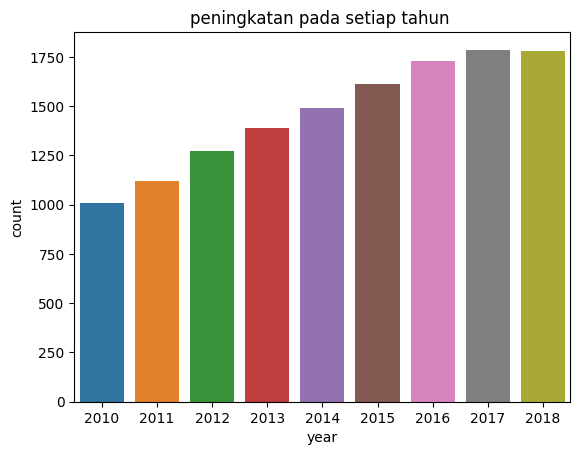

In [ ]:
#Peningkatan Jumlah Perusahaan
sns.countplot(data=df,
            x='year')

plt.title('peningkatan pada setiap tahun ')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


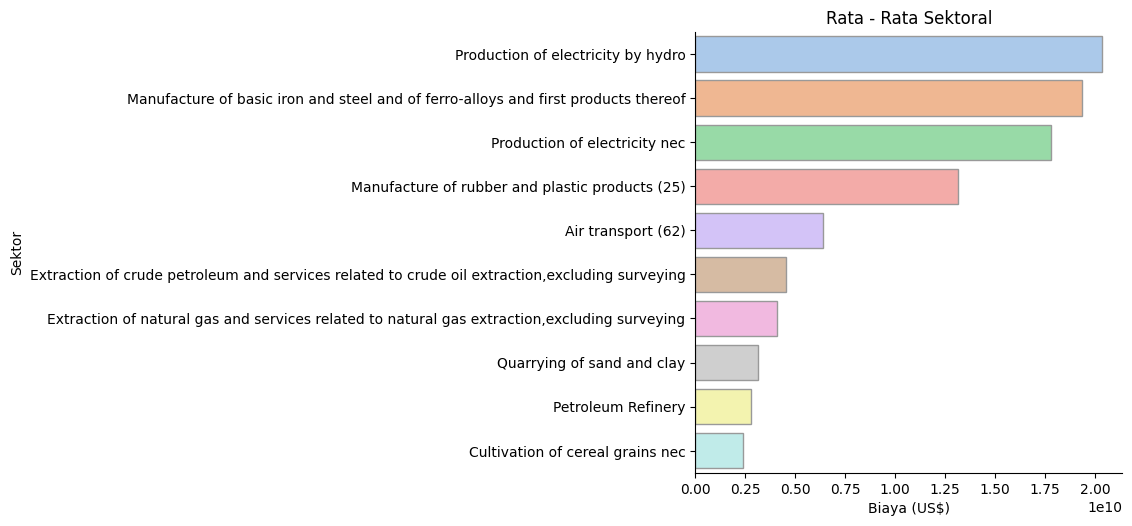

In [ ]:
##BAR CHART BIAYA SEKTORAL
data = gb_sector.sort_values(by='cost', ascending=False)
data = data.head(10)

sns.catplot(data = data,
    x = "cost", y = "industry",
    kind = "bar",
    palette="pastel", edgecolor=".6",
)
##label
plt.ylabel("Sektor")
plt.xlabel("Biaya (US$)")
plt.title("Rata - Rata Sektoral")

#show grafik
plt.show()

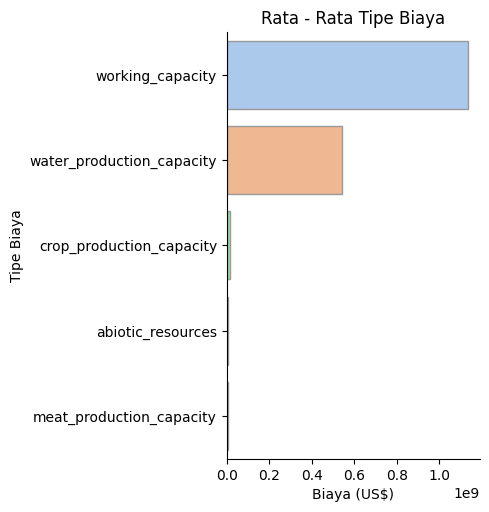

In [ ]:
##BAR CHART BIAYA SEKTORAL
data = gb_component.sort_values(by='cost', ascending=False)
data = data.head(5)

sns.catplot(data = data,
    x = "cost", y = "Type",
    kind = "bar",
    palette="pastel", edgecolor=".6",
)
##label
plt.ylabel("Tipe Biaya")
plt.xlabel("Biaya (US$)")
plt.title("Rata - Rata Tipe Biaya")

#show grafik
plt.show()

Dapat terlihat bahwa terdapat peningkatan dari jumlah frekuensi perusahaan dalam melakukan pelaporan/estimasi terkait dengan biaya lingkungan dari operasional perusahaan. Hal ini dapat menunjukan bahwa perusahaan-perusahaan di dunia semakin aktif dalam upaya mengetahui dampak terhadap lingkungan dari operasional perusahaan mereka.

**Distribusi Data**

Text(0.5, 1.0, 'Distribusi Persentase Pendapatan Operasional')

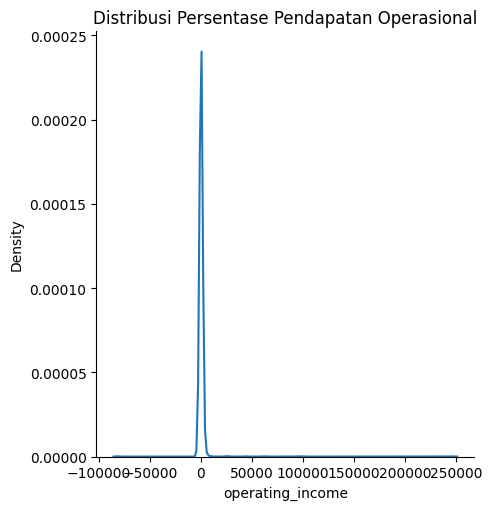

In [ ]:
sns.displot(data=df_new,
            x='operating_income',
            kind='kde')

plt.title('Distribusi Persentase Pendapatan Operasional')

Text(0.5, 1.0, 'Distribusi pendapatan')

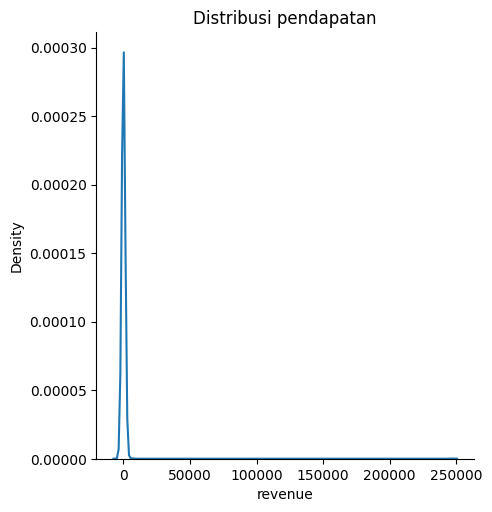

In [ ]:
sns.displot(data=df_new,
            x='revenue',
            kind='kde')

plt.title('Distribusi pendapatan')

Text(0.5, 1.0, 'Biaya Lingkungan')

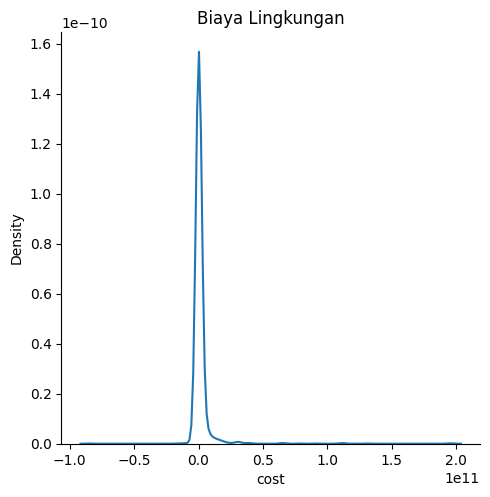

In [ ]:
sns.displot(data=df_new,
            x='cost',
            kind='kde')

plt.title('Biaya Lingkungan')

Dari segi distribusi dapat terlihat untuk elemen pendapatan, pendapatan operasional, dan biaya terhadap lingkungan semua cenderung menunjukan distribusi ke arah kiri dengan orientasi kepadatan di nol. Hal ini menyiratkan ada kemungkinan perusahaan yang memiliki biaya lingkungan yang relatif tinggi, dengan secara keseluruhan hampir menunjukan distribusi normal.

**Scatter Biaya Lingkungan dan Emisi Karbon**

In [ ]:
q1_cost = np.quantile(co2_cost["cost"], 0.25)
q3_cost = np.quantile(co2_cost["cost"], 0.75)
iqr_cost = q3_cost - q1_cost
UB_cost = q3_cost + 1.5*iqr_cost
LB_cost = q1_cost - 1.5*iqr_cost


In [ ]:
q1_co2 = np.quantile(co2_cost["CO2 emission (Tons)"], 0.25)
q3_co2 = np.quantile(co2_cost["CO2 emission (Tons)"], 0.75)
iqr_co2 = q3_co2 - q1_co2
UB_co2 = q3_co2 + 1.5*iqr_co2
LB_co2 = q1_co2 - 1.5*iqr_co2

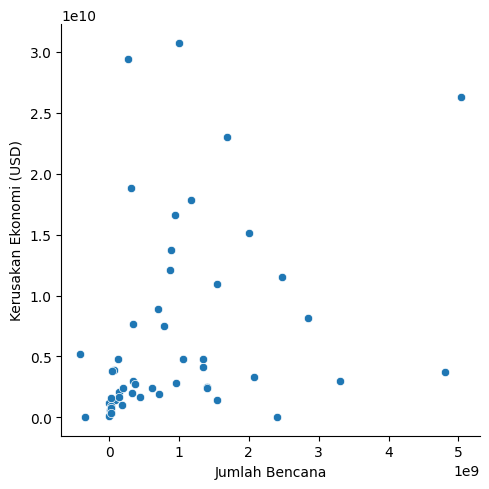

In [ ]:
data=co2_cost
data = data[(data["cost"]<UB_cost) & (data["cost"]>LB_cost) & (data["CO2 emission (Tons)"]<UB_co2) & (data["CO2 emission (Tons)"]>LB_co2)]

##Visualisasi Scatter dengan Trend
g = sns.relplot(data, x = data["cost"], y = data["CO2 emission (Tons)"])

##label
g.set(xlabel="Jumlah Bencana", ylabel="Kerusakan Ekonomi (USD)")
g.set_titles("Kerusakan Ekonomi USD")

#show grafik
plt.show()

**Scatter Plot Pendapatan Lingkungan dan Biaya Lingkungan**

Text(0.5, 1.0, 'Scatter ')

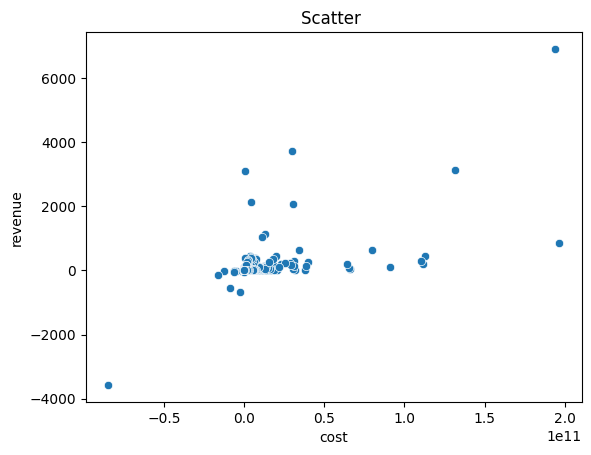

In [ ]:
sns.scatterplot(
    data=df_new[(df_new["revenue"]<200000)],
    y='revenue',
    x='cost')

plt.title('Scatter ')

Dari segi hubungan biaya dengan pendapatan, cenderung menunjukan hubungan positif, namun hal ini cenderung bersifat kounterintuitif. Hal ini bisa disebabkan karena, masih banyak perusahaan yang mampu menghasilkan pendapatan yang berkaitan dengan aktivitasnya terhadap lingkungan. Sehingga, secara perhitungan pendapatan yang dihasilkan cenderung turut memberikan kontribusi negatif terhadap lingkungan (biaya lingkungan semakin meningkat).

**Pola Hubungan Antara Total Biaya Lingkungan dan Komponen Biaya Lingkungan**

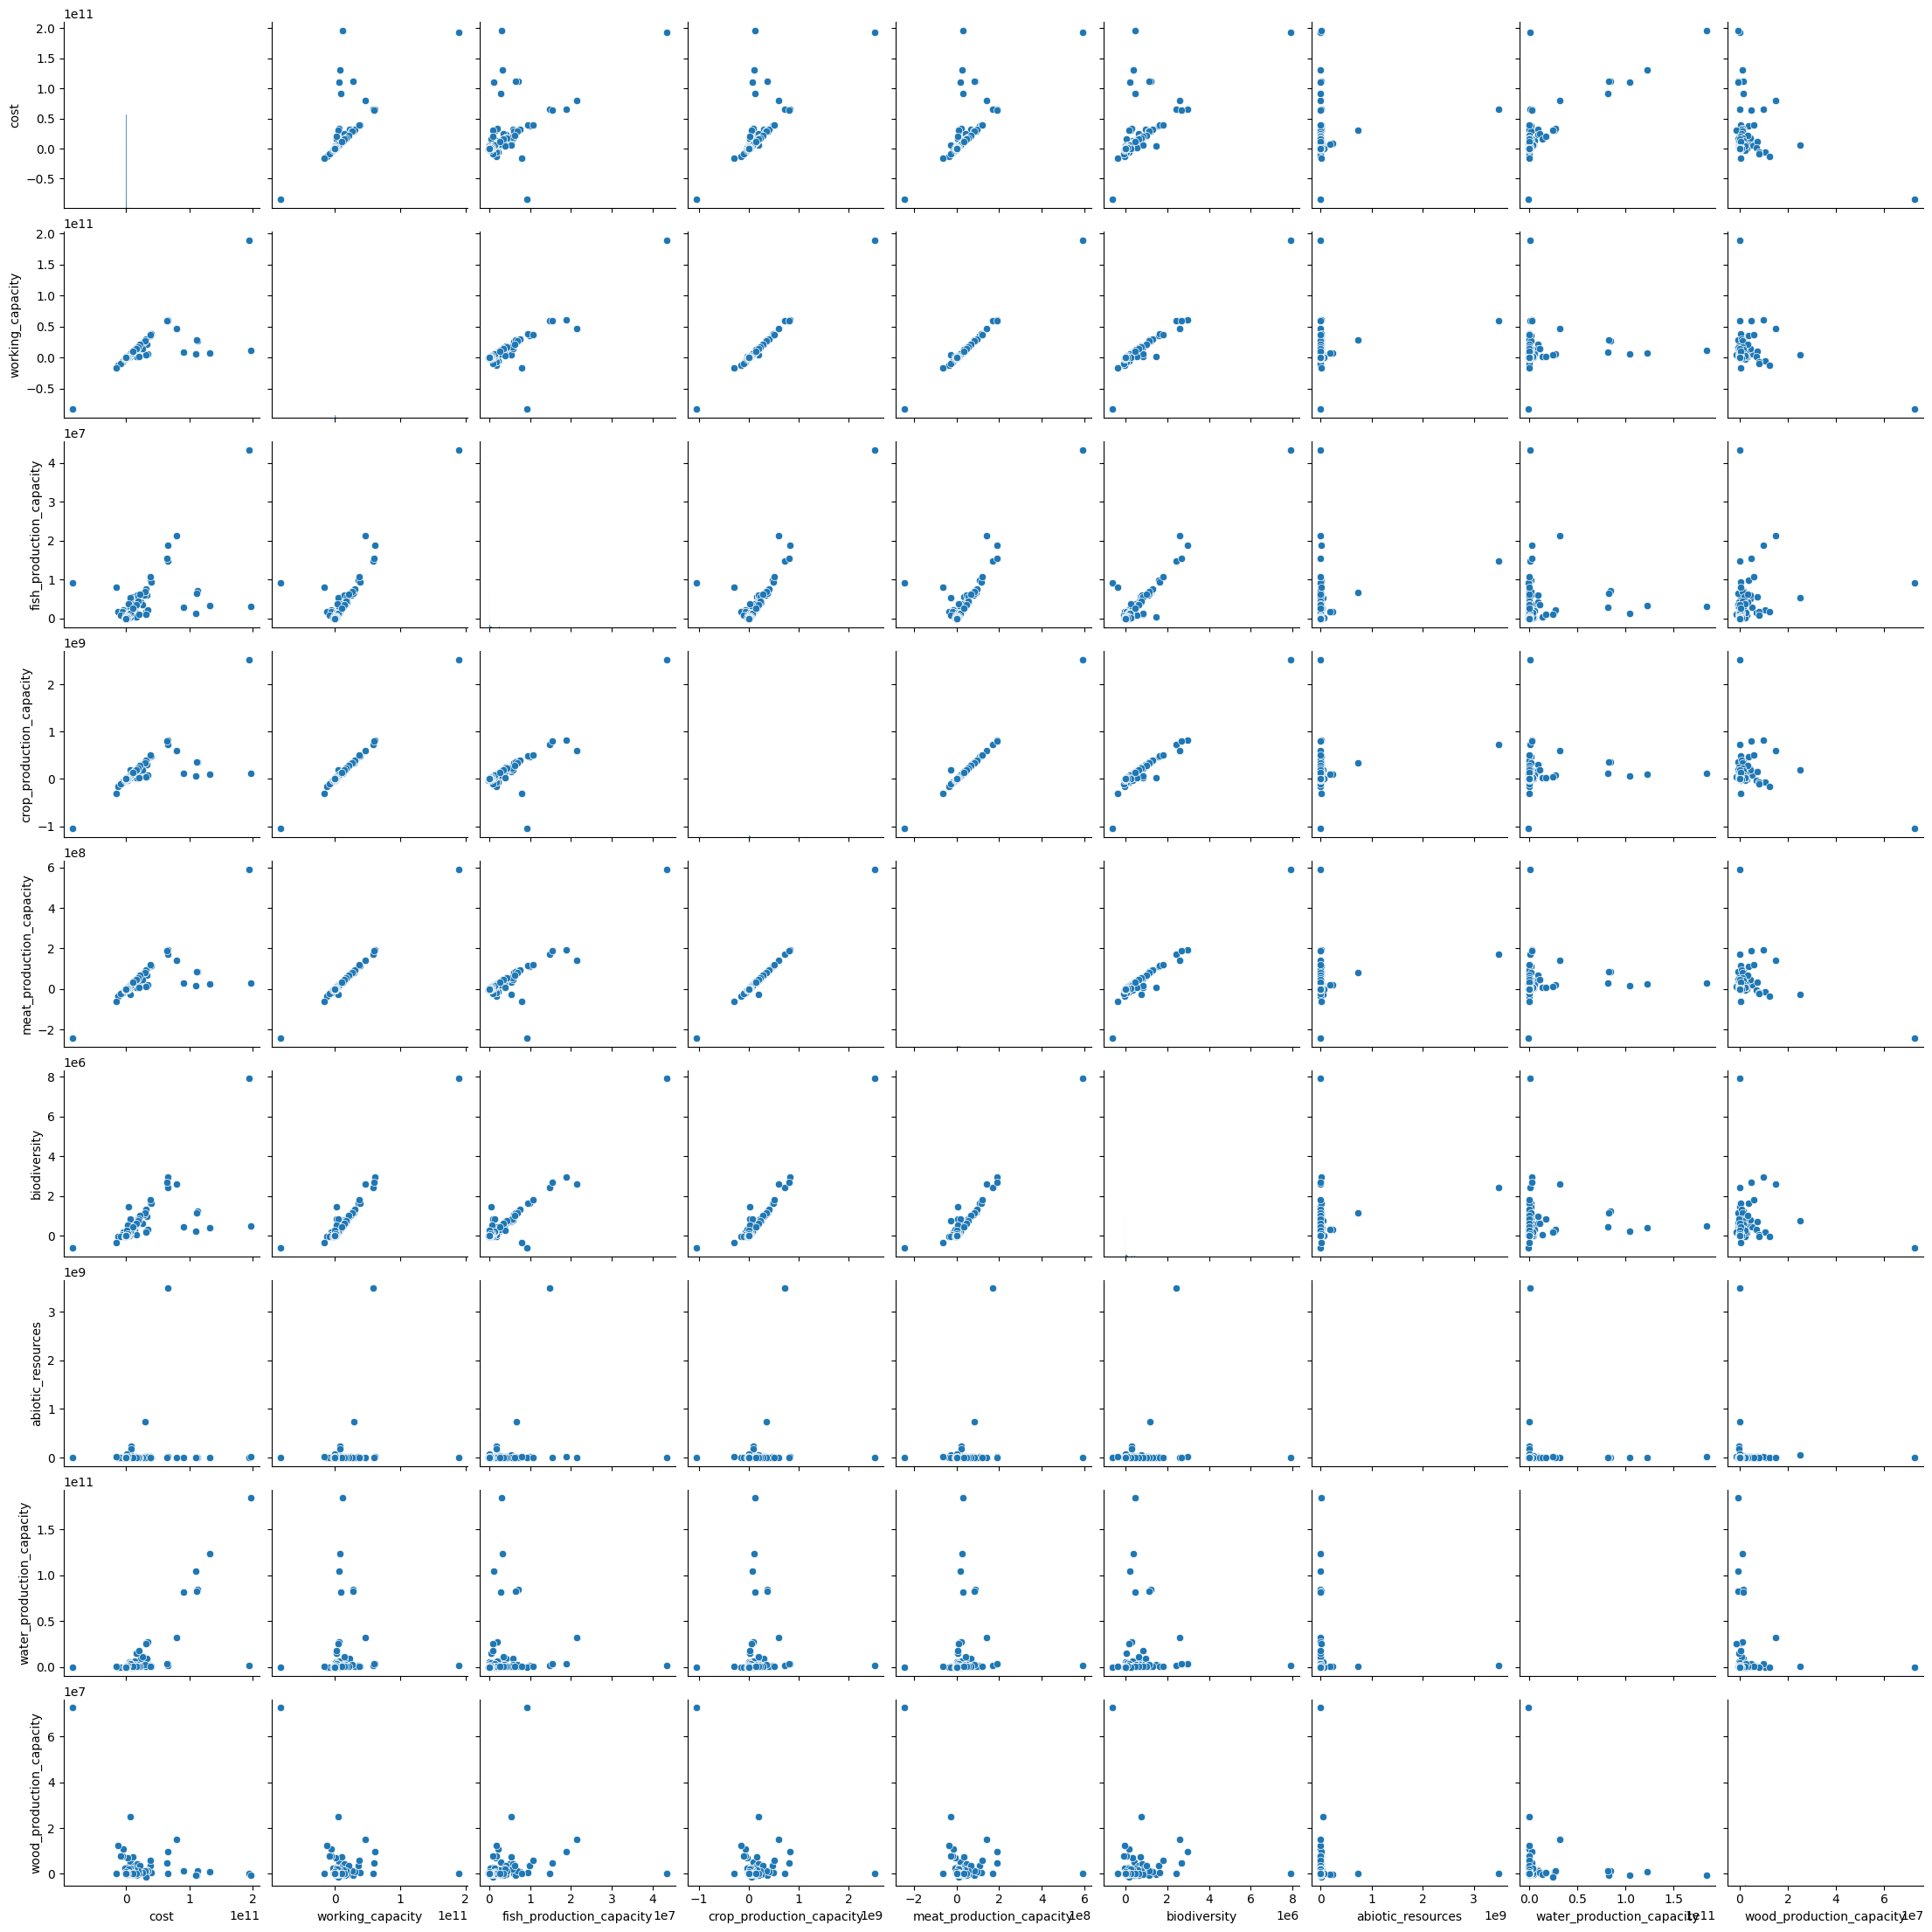

In [ ]:
df_pairplot = df_new[['cost', 'working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
       'wood_production_capacity']]
sns.pairplot(df_pairplot)

In [ ]:
df.columns

Index(['year', 'company', 'country', 'industry', 'revenue', 'operating_income',
       'cost', 'working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
       'wood_production_capacity', '%imputed'],
      dtype='object')

Diagram diatas dapat menunjukan hubungan antara total biaya lingkungan dengan komponen - komponen pembentuk dari biaya lingkungan tersebut. Dapat terlihat, secara keseluruhan komponen - komponen biaya lingkungan menunjukan hubungan positif. Namun, untuk 3 komponen terakhir (abiotic resources, water production, dan wood production capacity) cenderung tidak menunjukan arah hubungan yang pasti.

**Correlation Matrix (Heatmap)**

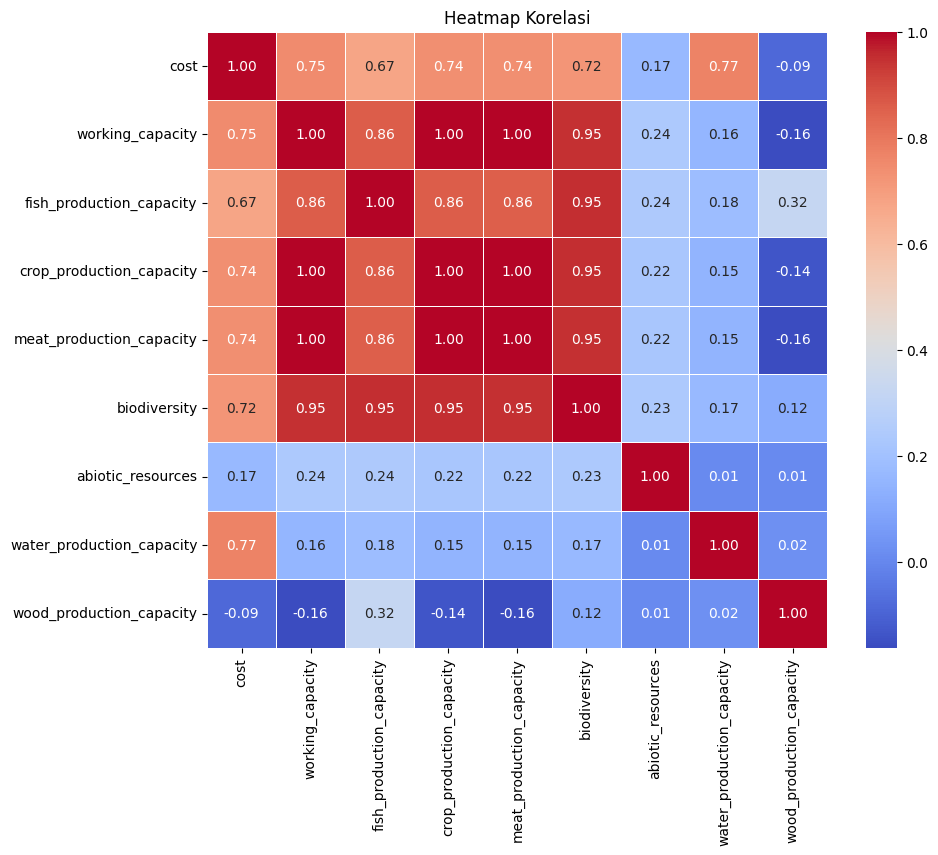

In [ ]:
df_pairplot = df_new[['cost', 'working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
       'wood_production_capacity']]

corr = df_pairplot.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
corr.sort

<bound method Series.sort_values of cost                         1.000000
working_capacity             0.748693
fish_production_capacity     0.674381
crop_production_capacity     0.741059
meat_production_capacity     0.740985
biodiversity                 0.722493
abiotic_resources            0.167337
water_production_capacity    0.771722
wood_production_capacity    -0.085133
Name: cost, dtype: float64>

Diagram diatas menunjukan korelasi antara komponen - komponen biaya lingkungan dan total biaya lingkungan. Dapat terlihat hubungan positif yang kuat (nilai diatas 0.7) diberikan oleh komponen biodiversity, meat production, crop production, fish production, dan working capacity. Sedangkan komponen yang lain cenderung menunjukan hubungan yang relatif lemah.

# **Modelling**

**REGRESI LINEAR**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Data_Cleaning.csv')
df.head()

,year,company,country,industry,revenue,operating_income,cost,working_capacity,fish_production_capacity,crop_production_capacity,meat_production_capacity,biodiversity,abiotic_resources,water_production_capacity,wood_production_capacity,%imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,1.09,10.05,55232974.0,48590497.0,11456,646758,151520,2061,3661.0,5828063.0,1042.0,2.0
1,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediati...,0.81,5.31,55143250.0,50727341.0,11763,673791,157783,2131,3489.0,3567524.0,571.0,0.0
2,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,1.53,9.38,54677862.0,53489006.0,12428,711263,166744,2244,3428.0,293207.0,458.0,1.0
3,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediati...,2.26,35.02,43298590.0,18912678.0,4652,249594,58535,811,3850.0,24069048.0,578.0,2.0
4,2018,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,0.56,4.40,30862191.0,30189038.0,7276,402067,94143,1298,3953.0,165542.0,1126.0,3.0


**Mendefinisikan Nilai X dan Y**

In [ ]:
df.columns

Index(['year', 'company', 'country', 'industry', 'revenue', 'operating_income',
       'cost', 'working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
       'wood_production_capacity', '%imputed'],
      dtype='object')

In [ ]:
#feature category country

country = df["country"]

country_dummy = pd.get_dummies(country, prefix = "country")

In [ ]:
#feature category industry

industry = df["industry"]

industry_dummy = pd.get_dummies(industry, prefix = "industry")

In [ ]:
x = df[['working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
       'wood_production_capacity']]
y = df['cost']

In [ ]:
#Appending Categorical Features

x2 = pd.concat([x, industry_dummy, country_dummy], axis = 1)

In [ ]:
x2.shape

(13177, 135)

**MODELLING-LINEAR REGRESSION**

In [ ]:
## MODEL 1 (AWAL-SEMUA X DIMASUKKAN)

# x, y
x = df[['working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
       'wood_production_capacity']]
y = df['cost']

# Split Training Test Dataset Transform
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Fitting Model
from sklearn.linear_model import LinearRegression
reg1 =LinearRegression(fit_intercept=False)
reg1.fit(x_train,y_train)

# Predicting Model
y_pred1 = reg1.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluasi Model 1
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_reg1 = mean_squared_error(y_test, y_pred1)
rmse_reg1 = np.sqrt(mse_reg1)
r2_reg1 = r2_score(y_test, y_pred1)

In [ ]:
## MODEL 2 (x dengan 1 var. korelasi paling tinggi)

# x, y
x = df['working_capacity']
y = df['cost']

# Split Training Test Dataset Transform
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

x_train = np.array(x_train)
x_test = np.array(x_train)
y_train = np.array(x_train)
y_test = np.array(x_train)

# Fitting Model
from sklearn.linear_model import LinearRegression
reg2 =LinearRegression(fit_intercept=False)
reg2.fit(x_train.reshape(-1, 1),y_train)

# Predicting Model
y_pred2 = reg2.predict(x_test.reshape(-1, 1))

# Evaluasi model 2
mse_reg2 = mean_squared_error(y_test, y_pred2)
rmse_reg2 = np.sqrt(mse_reg2)
r2_reg2 = r2_score(y_test, y_pred2)

In [ ]:
## MODEL 3 (x dengan 2 var. korelasi paling tinggi)

# x, y
x = df[['working_capacity', 'crop_production_capacity']]
y = df['cost']

# Split Training Test Dataset Transform
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Fitting Model
from sklearn.linear_model import LinearRegression
reg3 =LinearRegression(fit_intercept=False)
reg3.fit(x_train,y_train)

# Predicting Model
y_pred3 = reg3.predict(x_test)

# Evaluasi model 3
mse_reg3 = mean_squared_error(y_test, y_pred3)
rmse_reg3 = np.sqrt(mse_reg3)
r2_reg3 = r2_score(y_test, y_pred3)

In [ ]:
## MODEL 4 (x dengan 3 var. korelasi paling tinggi)

# x, y
x = df[['working_capacity','crop_production_capacity', 'meat_production_capacity']]
y = df['cost']

# Split Training Test Dataset Transform
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Fitting Model
from sklearn.linear_model import LinearRegression
reg4 =LinearRegression(fit_intercept=False)
reg4.fit(x_train,y_train)

# Predicting Model
y_pred4 = reg4.predict(x_test)

# Evaluasi model 4
mse_reg4 = mean_squared_error(y_test, y_pred4)
rmse_reg4 = np.sqrt(mse_reg4)
r2_reg4 = r2_score(y_test, y_pred4)

In [ ]:
## MODEL 5 (x dengan 4 var. korelasi paling tinggi)

# x, y
x = df[['water_production_capacity','working_capacity','abiotic_resources',
        'meat_production_capacity']]
y = df['cost']

# Split Training Test Dataset Transform
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Fitting Model
from sklearn.linear_model import LinearRegression
reg5 =LinearRegression(fit_intercept=False)
reg5.fit(x_train,y_train)

# Predicting Model
y_pred5 = reg5.predict(x_test)

# Evaluasi model 5
mse_reg5 = mean_squared_error(y_test, y_pred5)
rmse_reg5 = np.sqrt(mse_reg5)
r2_reg5 = r2_score(y_test, y_pred5)

In [ ]:
# EVALUASI MODEL

print(f"Evaluasi Model 1")
print(f"Mean Squared Error Model 1: {mse_reg1}")
print(f"Root Mean Squared Error Model 1: {rmse_reg1}")
print(f"R-square Model 1: {r2_reg1}")

print(f" ")

print(f"Evaluasi Model 2")
print(f"Mean Squared Error Model 2: {mse_reg2}")
print(f"Root Mean Squared Error Model 2: {rmse_reg2}")
print(f"R-square Model 2: {r2_reg2}")

print(f" ")

print(f"Evaluasi Model 3")
print(f"Mean Squared Error Model 3: {mse_reg3}")
print(f"Root Mean Squared Error Model 3: {rmse_reg3}")
print(f"R-square Model 3: {r2_reg3}")

print(f" ")

print(f"Evaluasi Model 4")
print(f"Mean Squared Error Model 4: {mse_reg4}")
print(f"Root Mean Squared Error Model 4: {rmse_reg4}")
print(f"R-square Model 4: {r2_reg4}")

print(f" ")

print(f"Evaluasi Model 5")
print(f"Mean Squared Error Model 5: {mse_reg5}")
print(f"Root Mean Squared Error Model 5: {rmse_reg5}")
print(f"R-square Model 5: {r2_reg5}")

Evaluasi Model 1
Mean Squared Error Model 1: 197685820540.4929
Root Mean Squared Error Model 1: 444618.73615547613
R-square Model 1: 0.9999999983865108
 
Evaluasi Model 2
Mean Squared Error Model 2: 2.061614258290428e-12
Root Mean Squared Error Model 2: 1.4358322528382026e-06
R-square Model 2: 1.0
 
Evaluasi Model 3
Mean Squared Error Model 3: 7.026008478189119e+19
Root Mean Squared Error Model 3: 8382128893.1804905
R-square Model 3: 0.42654516566734124
 
Evaluasi Model 4
Mean Squared Error Model 4: 6.920732928533039e+19
Root Mean Squared Error Model 4: 8319094258.711725
R-square Model 4: 0.43513763649551007
 
Evaluasi Model 5
Mean Squared Error Model 5: 11725809648135.898
Root Mean Squared Error Model 5: 3424296.956768776
R-square Model 5: 0.9999999042952731


Dari hasil modelling diatas dapat diperoleh bahwa model 1, 2, dan 5 cenderung menghasilkan hasil yang overfitting (sebab r-square yang mendekati sempurna). Sehingga, model yang diduga tidak overfit adalah model 3 dan 4. Lebih Lanjut, model 4 akan dipilih untuk proyeksi dikarenakan nilai MSE dan RMSE yang relatif rendah dibanding model 3.

**Visualisasi Diagram Regresi**

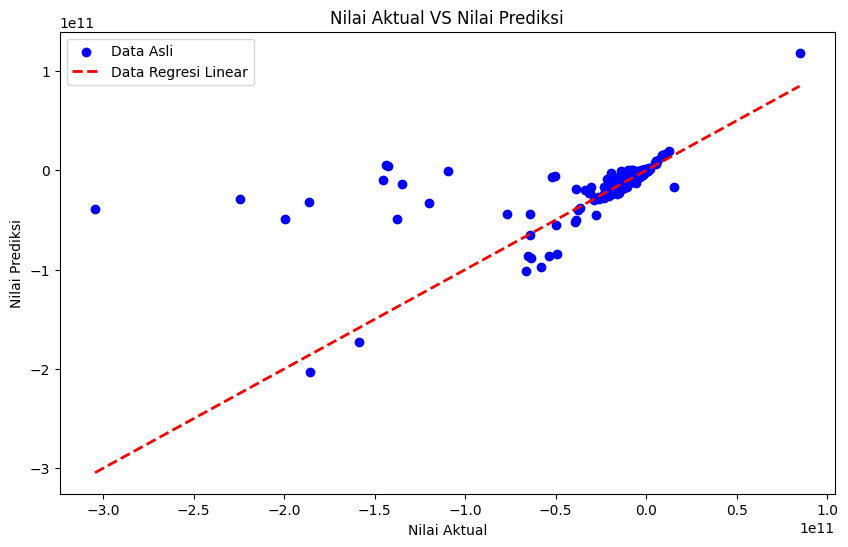

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred3, color='blue', label='Data Asli')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Data Regresi Linear')

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Aktual VS Nilai Prediksi')
plt.legend()
plt.show()


**Mencari Nilai Selisih**

In [ ]:
pred_y_df = pd.DataFrame({'Nilai Aktual':y_test,'Nilai Prediksi':y_pred3,'Selisih':y_pred3-y_test})
pred_y_df

,Nilai Aktual,Nilai Prediksi,Selisih
1742,5367017.0,1.823050e+08,1.769380e+08
1547,24574663.0,2.130820e+08,1.885074e+08
3351,11569525.0,1.876701e+08,1.761005e+08
2976,24991270.0,2.038419e+08,1.788506e+08
2553,84143364.0,2.671670e+08,1.830236e+08
...,...,...,...
5863,328462689.0,5.038361e+08,1.753734e+08
2828,613828695.0,7.969353e+08,1.831066e+08
6230,4900216.0,1.815040e+08,1.766038e+08
1197,225943157.0,4.414700e+08,2.155269e+08


**Ringkasan Regresi**

In [ ]:
##STATMODELS
import statsmodels.api as sm

In [ ]:
# x, y
x = df[['working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
       'wood_production_capacity']]
y = df['cost']

# Split Training Test Dataset Transform
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

##FITTING MODEL AND RESULT SUMMARY
model = sm.OLS(y_train, x_train, hasconst=1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.122e+11
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:11:12   Log-Likelihood:            -1.3275e+05
No. Observations:                9223   AIC:                         2.655e+05
Df Residuals:                    9215   BIC:                         2.656e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
working_capacity      

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# x, y

x = df[['working_capacity','crop_production_capacity', 'meat_production_capacity']]
y = df['cost']

# Split Training Test Dataset Transform
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
# Make predictions
y_pred_rr = model.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_rr = mean_squared_error(y_test, y_pred_rr)
rmse_rr = np.sqrt(mse_rr)
r2_rr = r2_score(y_test, y_pred_rr)

print(f"Mean Squared Error: {mse_rr}")
print(f"Root Mean Squared Error: {rmse_rr}")
print(f"R-Square: {r2_rr}")

Mean Squared Error: 5.080182902733756e+19
Root Mean Squared Error: 7127540180.689096
R-Square: 0.5853612397550574


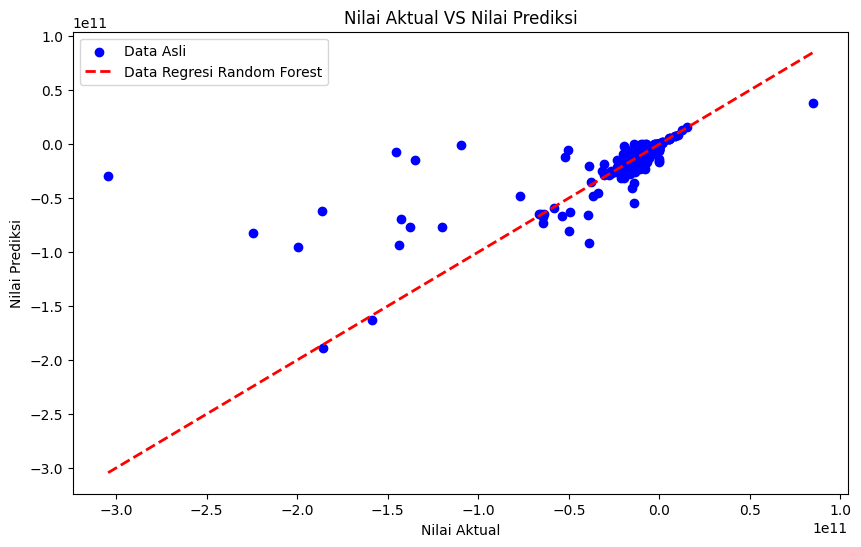

In [ ]:
# VISUALISASI PREDIKSI
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rr, color='blue', label='Data Asli')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Data Regresi Random Forest')

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Aktual VS Nilai Prediksi')
plt.legend()
plt.show()


**Random Forest-Feature Importance (Relative Importance)**

In [ ]:
# Defining X (ALL X are included)
x = df[['working_capacity', 'fish_production_capacity',
       'crop_production_capacity', 'meat_production_capacity', 'biodiversity',
       'abiotic_resources', 'water_production_capacity',
       'wood_production_capacity']]
y = df['cost']

# Create and fit the model
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# feature importance

feature_importances = model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

                     Feature  Importance
6  water_production_capacity    0.666027
3   meat_production_capacity    0.145974
0           working_capacity    0.073408
2   crop_production_capacity    0.065712
1   fish_production_capacity    0.028417
4               biodiversity    0.018350
5          abiotic_resources    0.002113
7   wood_production_capacity    0.000000


                     Feature  Importance
6  water_production_capacity    0.666027
3   meat_production_capacity    0.145974
0           working_capacity    0.073408
2   crop_production_capacity    0.065712
1   fish_production_capacity    0.028417
4               biodiversity    0.018350
5          abiotic_resources    0.002113
7   wood_production_capacity    0.000000


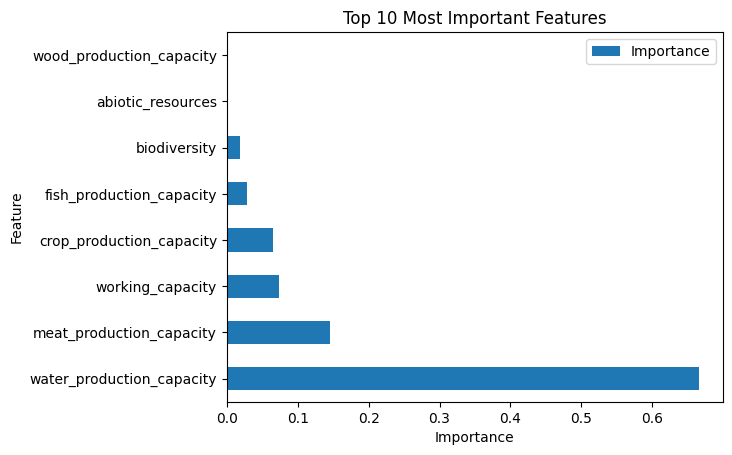

In [ ]:
##Visualization of Importance Features

# Sort the DataFrame by the importances
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(sorted_feature_importance_df.head(10))

# Optionally, you can plot the top N feature importances
import matplotlib.pyplot as plt

top_n = 10  # You can change this value to see more or fewer features
sorted_feature_importance_df.head(top_n).plot(kind='barh', x='Feature', y='Importance')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# save feauture importance
sorted_feature_importance_df.to_csv("important_feature.csv")

# **Link Final Project**

**Looker Studio**

https://lookerstudio.google.com/reporting/e680e077-44b7-4a6d-91f8-bea8015d3f25

**Canva**

https://www.canva.com/design/DAF1cFgfDAk/xUbYDdLmeiemDBAZoopZ3A/edit?utm_content=DAF1cFgfDAk&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

